### Setup and Data Download

The following blocks of code will help install the required packages and download the datasets to your Colab environment.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

There are 12 different CSV files containing crime data for each month of 2020. We downloaded each of them to the data folder. 

In [5]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/crime/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)

Downloaded data/2020-01-metropolitan-street.csv
Downloaded data/2020-02-metropolitan-street.csv
Downloaded data/2020-03-metropolitan-street.csv
Downloaded data/2020-04-metropolitan-street.csv
Downloaded data/2020-05-metropolitan-street.csv
Downloaded data/2020-06-metropolitan-street.csv
Downloaded data/2020-07-metropolitan-street.csv
Downloaded data/2020-08-metropolitan-street.csv
Downloaded data/2020-09-metropolitan-street.csv
Downloaded data/2020-10-metropolitan-street.csv
Downloaded data/2020-11-metropolitan-street.csv
Downloaded data/2020-12-metropolitan-street.csv


### Data Pre-Processing

Let's merge all 12 csv files into a single dataframe.

In [7]:
dataframe_list = []

for f in files:
  filepath = os.path.join(data_folder, f)
  df = pd.read_csv(filepath)
  dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)
merged_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87931,05780af1c8515c41499ef396a33fc4e5c248533cecd9c4...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Investigation complete; no suspect identified,NaN
87932,54ce60d717f01752c5ff44f870e07a503e3fbeaae0b91e...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
87933,580fdc2edfe26a09392ab6b9128732ba0c7cd05695387a...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Offender given a caution,NaN
87934,2730906a962972bed3589463c9be9dbb8ee8e594b779a3...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN


### Create a Pie Chart

Let’s create a pie-chart showing the distribution of different types of crime. Pandas groupby() function allows us to calculate group statistics.

In [8]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

Crime type
Anti-social behaviour           415105
Bicycle theft                    23517
Burglary                         61044
Criminal damage and arson        50923
Drugs                            51629
Other crime                      10066
Other theft                      81924
Possession of weapons             5763
Public order                     53458
Robbery                          27269
Shoplifting                      34588
Theft from the person            31084
Vehicle crime                   108344
Violence and sexual offences    227208
dtype: int64

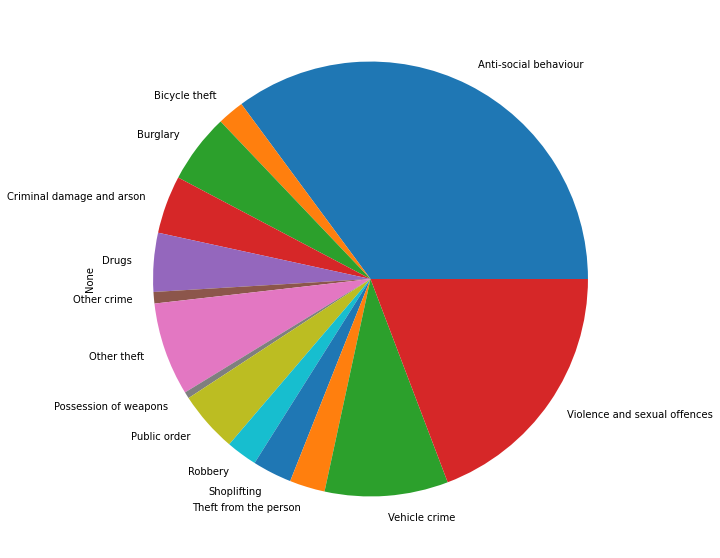

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 10)
type_counts.plot(kind = 'pie', ax=ax)
plt.show()

Let's customize the chart more.

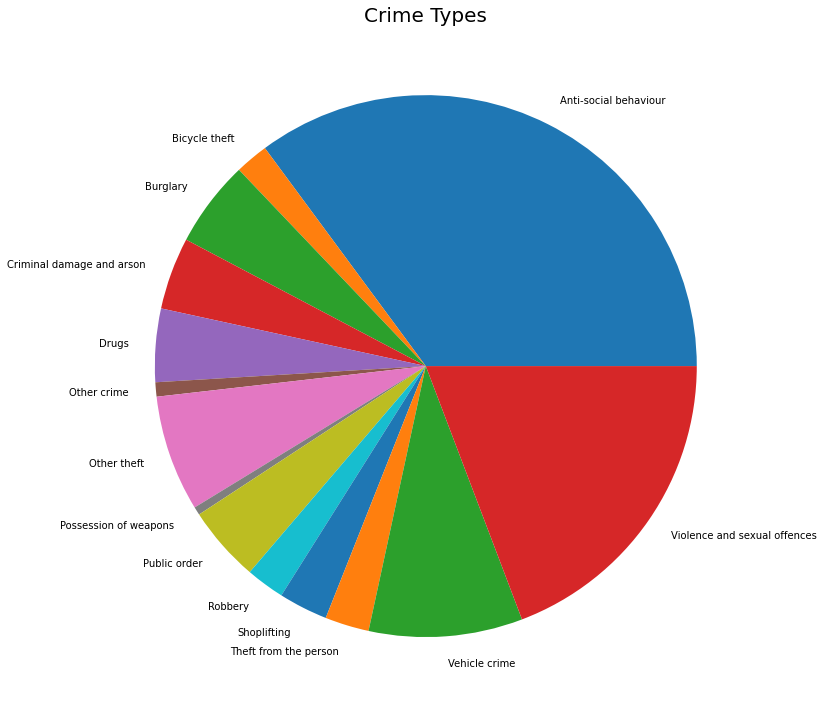

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax)

ax.set_title('Crime Types', fontsize = 20)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

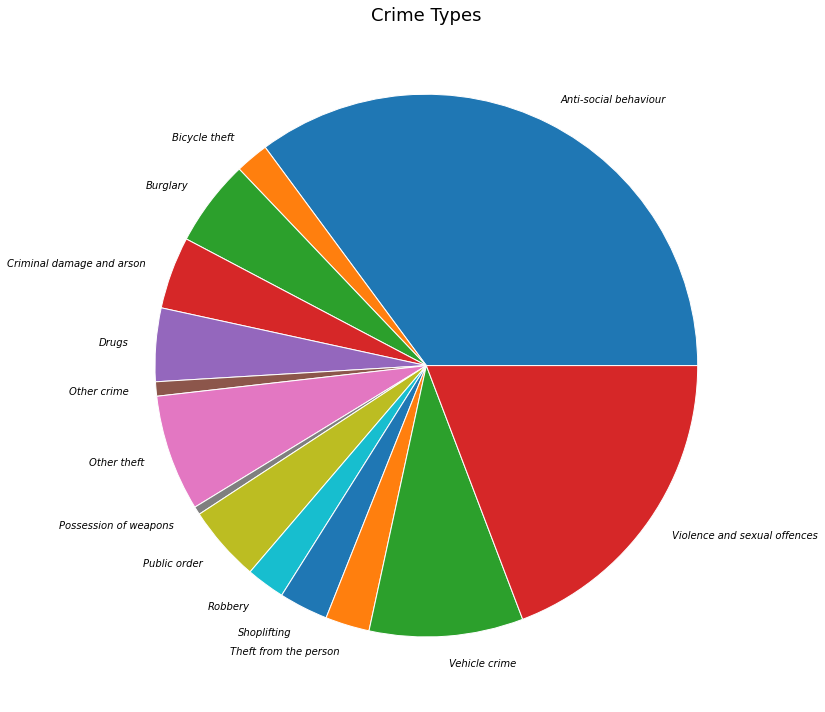

In [12]:
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
textprops = {'fontsize': 10, 'fontstyle': 'italic'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax, 
                 wedgeprops=wedgeprops,
                 textprops=textprops
                 )

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

### Create a Bar Chart

We can also chart the trend of crime over the year. For this, let’s group the data by month.

In [13]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

Month
2020-01     90979
2020-02     86984
2020-03     87409
2020-04    109951
2020-05    114008
2020-06    100198
2020-07    103657
2020-08    104782
2020-09     99633
2020-10     99471
2020-11     96914
2020-12     87936
dtype: int64

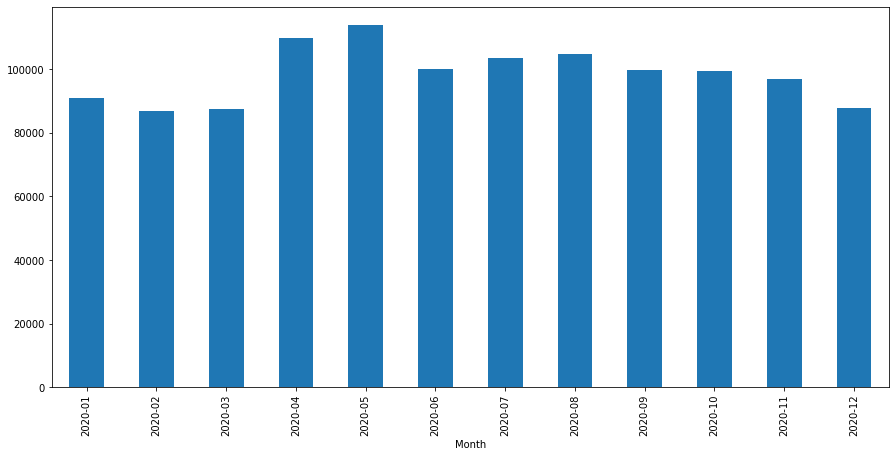

In [14]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts.plot(kind='bar', ax=ax)
plt.show()

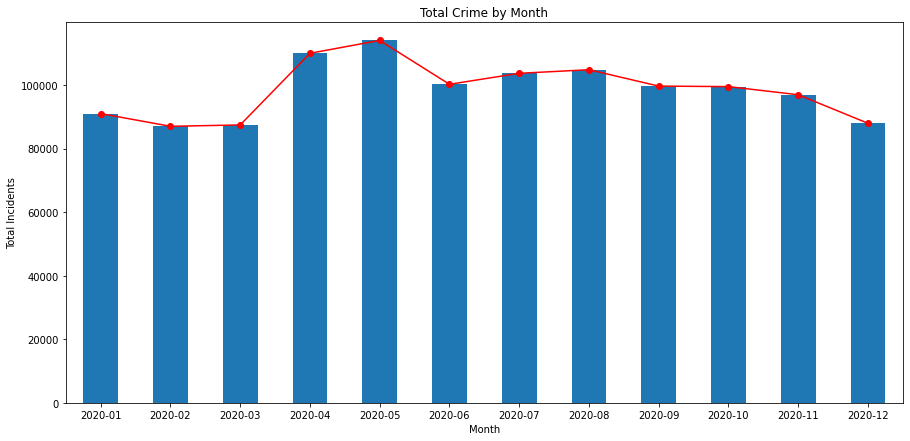

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

### Exercise

Plot the trend of Bicycle thefts as a line chart. The cell below filters the merged_df dataframe to select incidents of ‘Bicycle theft’. Group the results by months and plot the results.

In [25]:
bicycle_thefts_monthly_counts = merged_df[merged_df['Crime type'] == 'Bicycle theft'].groupby('Month').size()
print(bicycle_thefts_monthly_counts)

Month
2020-01    1172
2020-02    1044
2020-03    1078
2020-04    1060
2020-05    1768
2020-06    2548
2020-07    2833
2020-08    3019
2020-09    3078
2020-10    2619
2020-11    1985
2020-12    1313
dtype: int64


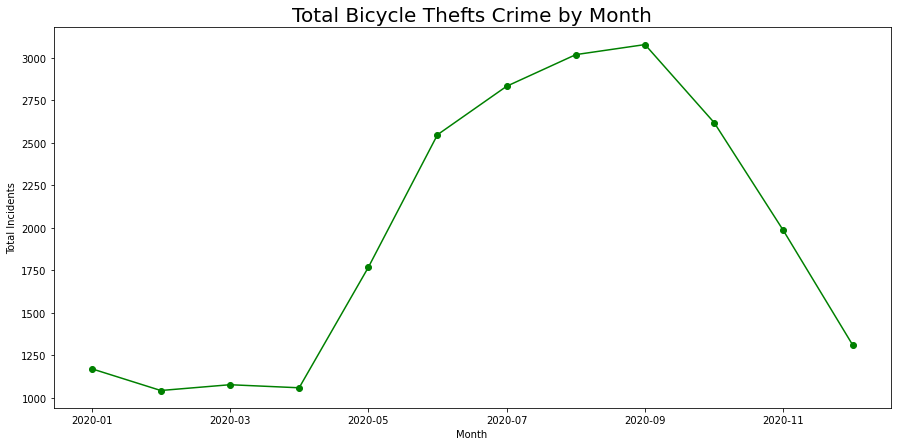

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

bicycle_thefts_monthly_counts.plot(kind='line', ax=ax, color='green', marker='o')

ax.set_title('Total Bicycle Thefts Crime by Month', fontsize = 20)
ax.set_ylabel('Total Incidents', fontsize = 10)

plt.show()